In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv("C:\\Users\\K.NAGI REDDY\\Downloads\\augmented_data\\augmented_omg.csv")
data.head(10)

,tweet_id,text,source,user_id,sentiment,topic,rumor_label
0,1,New study suggests that drinking lemon water c...,Twitter,123456,Positive,Health,True
1,2,Breaking News: UFO spotted over New York City!...,News,789012,Neutral,UFO,False
2,3,Alert: Beware of fake COVID-19 vaccine scams c...,Government,345678,Negative,COVID-19,False
3,4,Rumors circulating about a potential merger be...,Twitter,567890,Neutral,Tech,True
4,5,New conspiracy theory suggests that the moon l...,Online Forum,901234,Negative,Conspiracy,True
5,6,No evidence to support claims of a cure for ba...,News,567890,Neutral,Health,False
6,7,Local community spreading rumors about a new h...,Twitter,123456,Neutral,Community,True
7,8,Scientific community dismisses claims of a cur...,Online Forum,345678,Negative,Health,False
8,9,Rumors of a celebrity breakup spark controvers...,Twitter,789012,Neutral,Celebrity,True
9,10,Social media platforms crackdown on fake news ...,News,901234,Positive,Social Media,False


In [30]:
data.shape

(1824, 7)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     1824 non-null   int64 
 1   text         1824 non-null   object
 2   source       1824 non-null   object
 3   user_id      1824 non-null   int64 
 4   sentiment    1824 non-null   object
 5   topic        1824 non-null   object
 6   rumor_label  1824 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 87.4+ KB


In [32]:
data.isna().sum()

tweet_id       0
text           0
source         0
user_id        0
sentiment      0
topic          0
rumor_label    0
dtype: int64

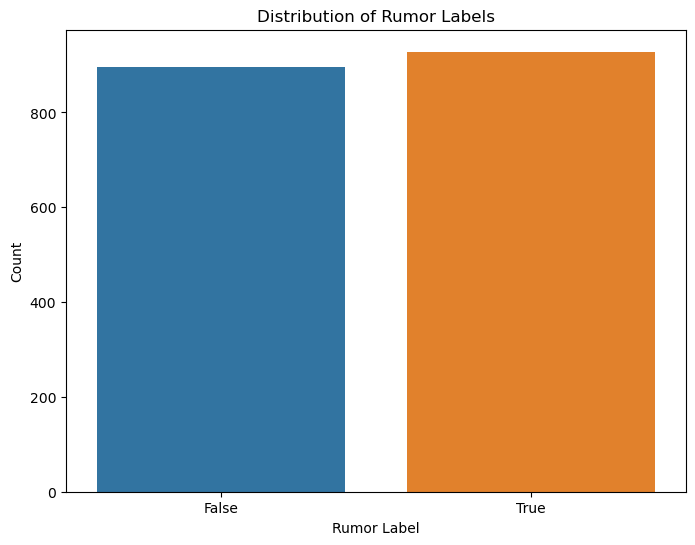

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rumor_label', data=data)
plt.title('Distribution of Rumor Labels')
plt.xlabel('Rumor Label')
plt.ylabel('Count')
plt.show()

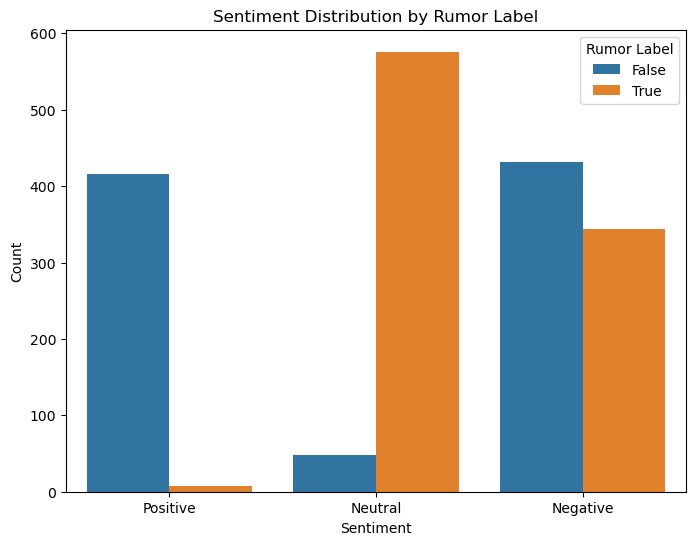

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='rumor_label', data=data)
plt.title('Sentiment Distribution by Rumor Label')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Rumor Label')
plt.show()

In [35]:
X = data['text']
y = data['rumor_label']

In [36]:
print(X,"\n\n\n",y)

0       New study suggests that drinking lemon water c...
1       Breaking News: UFO spotted over New York City!...
2       Alert: Beware of fake COVID-19 vaccine scams c...
3       Rumors circulating about a potential merger be...
4       New conspiracy theory suggests that the moon l...
                              ...                        
1819    Rumors of a government conspiracy to manipulat...
1820    Breaking: Rumors\r\n\r\n of a potential natura...
1821    Rumors of a new celebrity endorsement deal in ...
1822    Reports of a new trend in mindfulness meditati...
1823    Rumors of a major security breach at a leading...
Name: text, Length: 1824, dtype: object 


 0        True
1       False
2       False
3        True
4        True
        ...  
1819     True
1820    False
1821     True
1822    False
1823     True
Name: rumor_label, Length: 1824, dtype: bool


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [38]:
X_vectorized

<1824x282 sparse matrix of type '<class 'numpy.float64'>'
	with 16808 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score,classification_report

from sklearn.svm import LinearSVC

S_classifier = LinearSVC()
S_classifier.fit(X_train, y_train)
y_pred = S_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       175
        True       1.00      1.00      1.00       190

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



C:\Users\K.NAGI REDDY\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       175
        True       1.00      1.00      1.00       190

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       175
        True       1.00      1.00      1.00       190

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [43]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)*100

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       175
        True       1.00      1.00      1.00       190

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



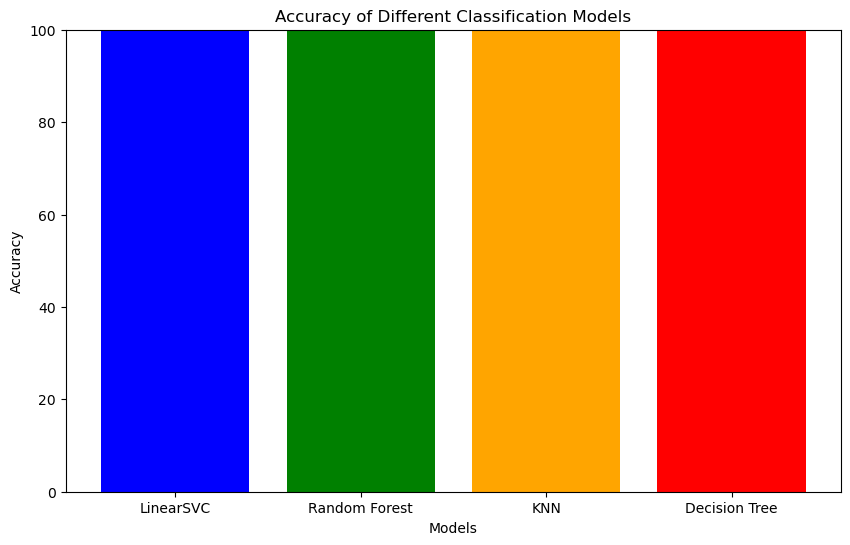

The best model is 'LinearSVC' with an accuracy of 100.0


In [44]:
models = ['LinearSVC', 'Random Forest', 'KNN', 'Decision Tree']
accuracies = [svm_accuracy, rf_accuracy, knn_accuracy, dt_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 100)
plt.show()

best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"The best model is '{best_model}' with an accuracy of {max(accuracies)}")

In [46]:
classifier = LinearSVC()
classifier.fit(X_train, y_train)

C:\Users\K.NAGI REDDY\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [47]:
y_pred = classifier.predict(X_test)

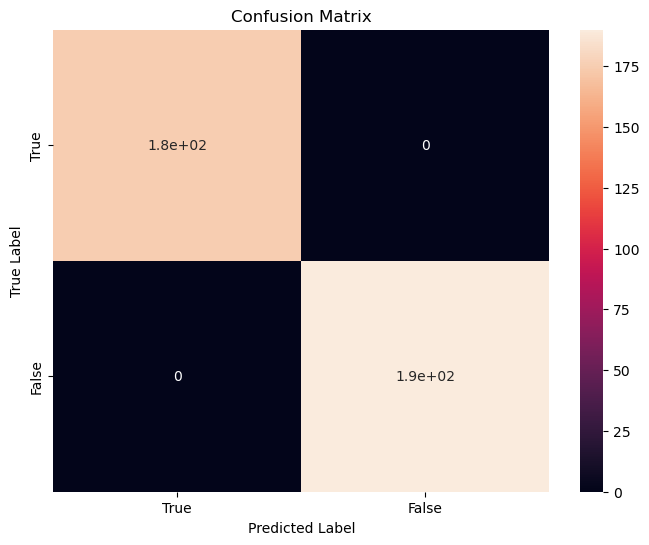

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
example_text = [input("enter rumor : ")]
example_text_vectorized = vectorizer.transform(example_text)
prediction = classifier.predict(example_text_vectorized)
print("Example prediction:", prediction)

enter rumor : covid
Example prediction: [False]
